In [59]:

ua_package_stats = '{}/{}'.format(ua_base_path,'list_apps_by_homma_san/ua_case.csv')
a_pos_stats = '{}/{}'.format(a_base_path,'list_apps_by_homma_san/positive/accepted_positive.csv')
a_neg_stats = '{}/{}'.format(a_base_path,'list_apps_by_homma_san/negative/accepted_negative.csv')


In [60]:
import pandas as pd

ua_package_stats_df = pd.read_csv(ua_package_stats)
ua_package_stats_df.head()

,package_name,ua_overall_count,percentage
0,jp.naver.line.android,4401098,9.0121
1,jp.co.nttdocomo.carriermail,4035558,8.2636
2,com.android.chrome,3975840,8.1413
3,com.twitter.android,2020621,4.1376
4,com.android.settings,633581,1.2974


In [61]:
a_pos_stats_df = pd.read_csv(a_pos_stats)
a_pos_stats_df.head()

,package_name,a_pos_overall_count,percentage
0,jp.co.nttdocomo.carriermail,6521,12.8981
1,com.android.chrome,3403,6.7309
2,jp.naver.line.android,2460,4.8657
3,com.android.settings,1418,2.8047
4,com.twitter.android,828,1.6377


In [62]:
a_neg_stats_df = pd.read_csv(a_neg_stats)
a_neg_stats_df.head()

,package_name,a_neg_overall_count,percentage
0,jp.co.nttdocomo.carriermail,3044,12.1289
1,com.android.chrome,1548,6.1681
2,jp.naver.line.android,1254,4.9966
3,com.android.settings,658,2.6218
4,com.twitter.android,536,2.1357


In [63]:
result_df = pd.merge(ua_package_stats_df,a_pos_stats_df, on='package_name', how='inner')
result_df = pd.merge(result_df,a_neg_stats_df, on='package_name', how='inner')
result_df.head(100)

,package_name,ua_overall_count,percentage_x,a_pos_overall_count,percentage_y,a_neg_overall_count,percentage
0,jp.naver.line.android,4401098,9.0121,2460,4.8657,1254,4.9966
1,jp.co.nttdocomo.carriermail,4035558,8.2636,6521,12.8981,3044,12.1289
2,com.android.chrome,3975840,8.1413,3403,6.7309,1548,6.1681
3,com.twitter.android,2020621,4.1376,828,1.6377,536,2.1357
4,com.android.settings,633581,1.2974,1418,2.8047,658,2.6218
5,com.facebook.katana,570079,1.1673,283,0.5598,197,0.7850
6,com.instagram.android,554476,1.1354,228,0.4510,115,0.4582
7,jp.co.yahoo.android.yjtop,467729,0.9578,405,0.8011,275,1.0957
8,com.nttdocomo.android.dmenu2,418724,0.8574,794,1.5705,248,0.9882
9,com.android.vending,275497,0.5641,425,0.8406,188,0.7491


In [64]:
result_df = result_df[['package_name','ua_overall_count','a_pos_overall_count','a_neg_overall_count']]
result_df['sum'] = result_df[['ua_overall_count','a_pos_overall_count','a_neg_overall_count']].sum(axis=1)
#result_df.head()
result_df.head(20)

,package_name,ua_overall_count,a_pos_overall_count,a_neg_overall_count,sum
0,jp.naver.line.android,4401098,2460,1254,4404812
1,jp.co.nttdocomo.carriermail,4035558,6521,3044,4045123
2,com.android.chrome,3975840,3403,1548,3980791
3,com.twitter.android,2020621,828,536,2021985
4,com.android.settings,633581,1418,658,635657
5,com.facebook.katana,570079,283,197,570559
6,com.instagram.android,554476,228,115,554819
7,jp.co.yahoo.android.yjtop,467729,405,275,468409
8,com.nttdocomo.android.dmenu2,418724,794,248,419766
9,com.android.vending,275497,425,188,276110


In [65]:
result_df['ua_perc']= round(result_df['ua_overall_count']/result_df['sum'] * 100,4)
result_df['a_pos_perc']= round(result_df['a_pos_overall_count']/result_df['sum'] * 100,4)
result_df['a_neg_perc']= round(result_df['a_neg_overall_count']/result_df['sum'] * 100,4)
result_df=result_df.sort_values('a_pos_perc',ascending=False).reset_index()
result_df= result_df[['package_name','ua_perc','a_pos_perc','a_neg_perc']]
result_df.head(15)

,package_name,ua_perc,a_pos_perc,a_neg_perc
0,com.android.settings,99.6734,0.2231,0.1035
1,com.nttdocomo.android.dmenu2,99.7518,0.1892,0.0591
2,jp.co.nttdocomo.carriermail,99.7635,0.1612,0.0753
3,com.android.vending,99.7780,0.1539,0.0681
4,jp.co.yahoo.android.yjtop,99.8548,0.0865,0.0587
5,com.android.chrome,99.8756,0.0855,0.0389
6,jp.naver.line.android,99.9157,0.0558,0.0285
7,com.facebook.katana,99.9159,0.0496,0.0345
8,com.instagram.android,99.9382,0.0411,0.0207
9,com.twitter.android,99.9325,0.0409,0.0265


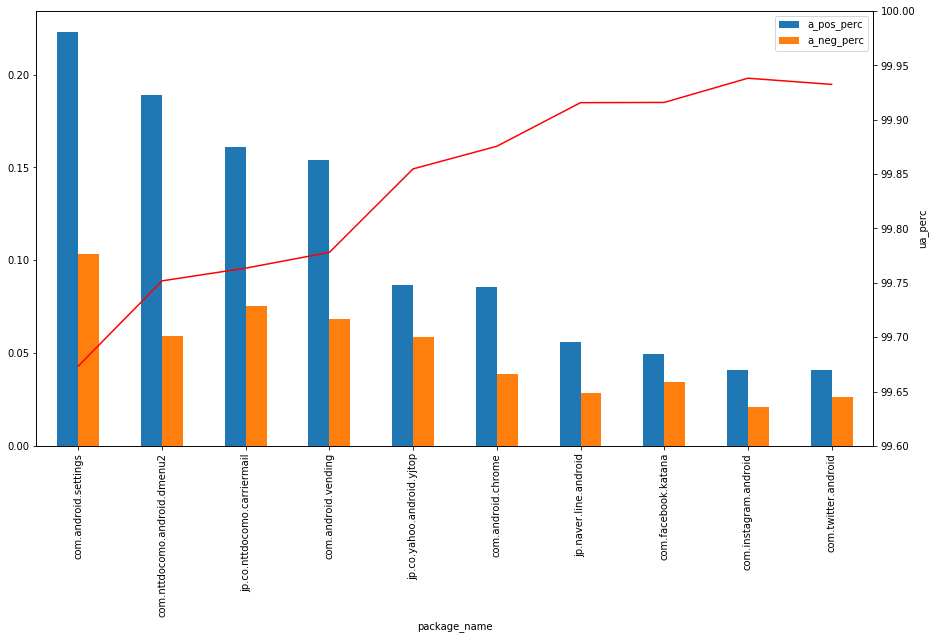

In [72]:
from numpy import array
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="package_name", y=['a_pos_perc','a_neg_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('ua_perc')
ax2.set_ylim((99.6,100.0))
plt.show()

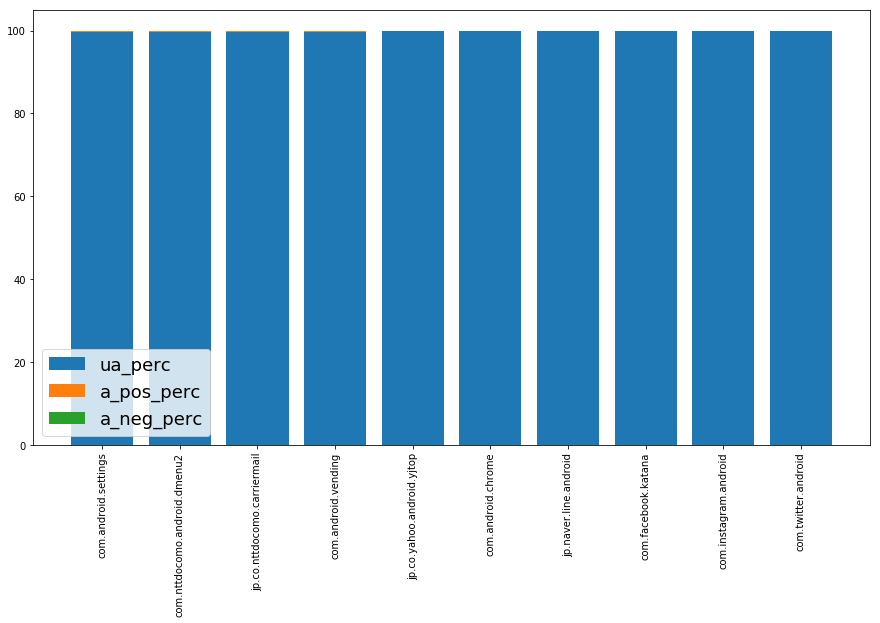

In [70]:
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df.columns[~result_df.columns.isin(['package_name'])]:
    plt.bar(result_df.package_name, result_df[col], bottom=cumval, label=col)
    cumval = cumval+result_df[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)